<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [105]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [106]:
# Read CSV
house_csv = pd.read_csv("Sacramento_transactions.csv")

In [107]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [108]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [109]:
#find null values
house_csv.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [110]:
#house_csv = house_csv.loc[~((house_csv['beds'] == 0) | (house_csv['baths'] == 0) | (house_csv['sq__ft'] == 0) | (house_csv['price'] == 0))]
house_csv = house_csv[(house_csv[['beds','baths', 'sq__ft']] != 0).all(axis=1)]
house_csv

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
# Price as we are using the data in price to find the resulting predited price

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
# beds, baths, sq__ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [86]:
house_csv.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


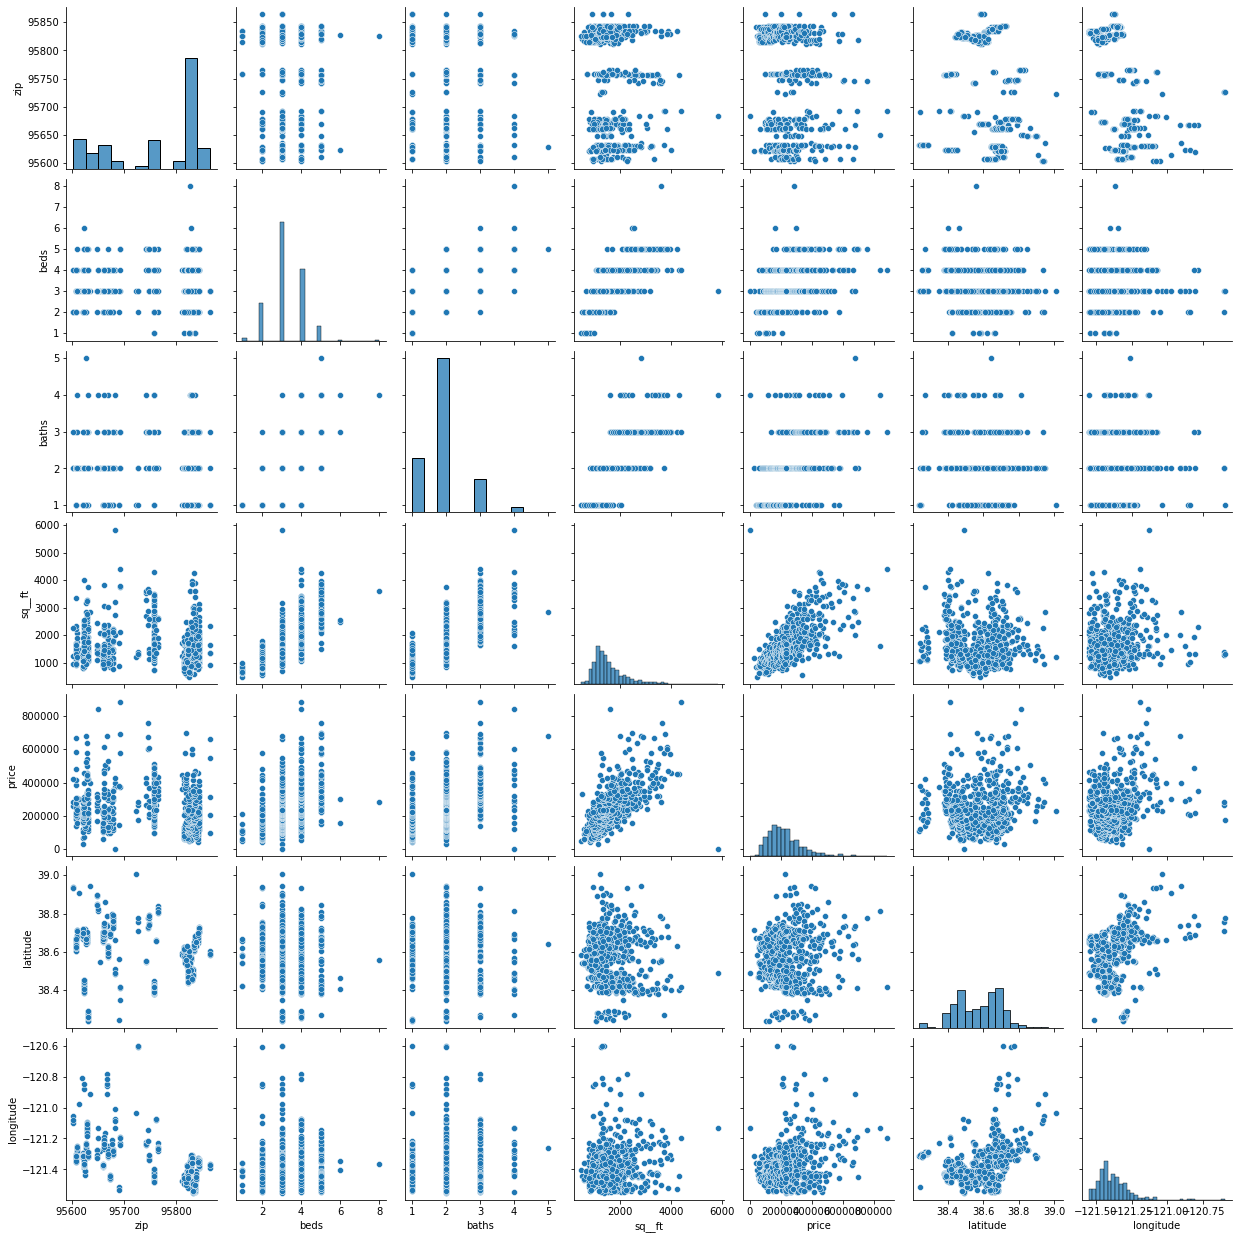

In [87]:
# ANSWER
sns.pairplot(house_csv)
# best predictor is sq__ft as it has the highest correlation with price after baths. 

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

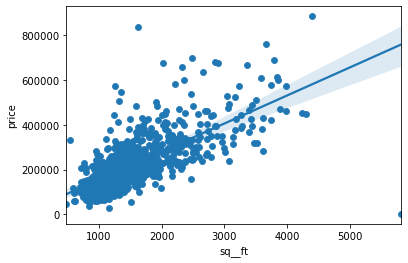

In [98]:
# ANSWER
# Using linear regression
#scatterplot to visualise correlation
sns.scatterplot(x='sq__ft', y='price', data=house_csv)

#linear regression model fit
sns.regplot(x='sq__ft', y='price', data=house_csv)


In [97]:
#numpy polyfit
x = house_csv['sq__ft']
y = house_csv['price']
np.polyfit(x,y,1) # degree of polynomial = highest power = x^n where n = degree #straight line graph can only be 1

#y = mx + c
#m = coef of x: 125.2164
#c = intercept: 30210.63386
#y = 125 * x + 30210

array([  125.21648668, 30210.63386692])

In [63]:
#reference: https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression

#Import the packages and classes needed 
import numpy as np
from sklearn.linear_model import LinearRegression

#Create a numpy array of data
sq__ft = np.array(house_csv['sq__ft'])
x = sq__ft.reshape(-1,1) # .reshape cos needs to be 2D 
y = house_csv['price']

#Create a model and fit it with .fit()
model = LinearRegression().fit(x,y) 
# .fit calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments

#The following section will get results by interpreting the created instance

#Obtain coefficient of determination by calling the model with the score() function, then print coefficient
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)

#Print Intercept
print('intercept: ', model.intercept_)

#Print SLope
print('slope: ', model.coef_)

#Predict a Response and print
y_pred = model.predict(x)
print('Predicted response: ', y_pred, sep='\n')

coefficient of determination: 0.4812307133326901
intercept:  30210.633866919
slope:  [125.21648668]
Predicted response: 
[134891.61673127 176338.2738223  129882.95726408 136895.08051815
 130008.17375076 170703.5319217  168449.63516147 177590.4386891
 148039.34783265 173708.72760202 144032.4202589  191614.68519724
 139274.19376506 157931.45028036 158181.88325372 172206.12976186
 135893.34862471 129757.7407774  103837.92803467 200004.18980479
 170202.66597499 196623.34466443 185479.07734993 230682.22904135
 143030.68836546 166446.17137459 150794.11053961 170327.88246167
 203009.3854851  186480.80924337 160310.56352728 174460.0265221
 203009.3854851  169952.23300163 160310.56352728 207767.61197894
 165694.87245451 214529.30225965 173708.72760202 125375.1637436
 193492.93249744 181346.93328949 162439.24380083 160811.429474
 228929.19822783 170453.09894834 228052.68282107 275008.86532602
 237569.13580874 215155.38469305 178967.82004257 229304.84768787
 213402.35387953 244831.69203617 178592

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [99]:
#Residual = Observed value – Predicted value
residual_values = abs(y - y_pred) #abs() for absolute values
residual_values

0       75669.616731
1      108126.273822
2       61002.957264
3       67588.080518
4       48108.173751
           ...      
980     83279.223497
981     18844.615307
982     52526.118330
983      5899.413922
984     34982.511275
Name: price, Length: 814, dtype: float64

In [100]:
#Ryan's answer
#y = 125 * x + 30210
def predict_price(sq__ft): 
    price = 125 * sq__ft + 30210
    return price

predicted_prices = house_csv['sq__ft'].apply(predict_price)

In [101]:
predicted_prices

0      134710
1      176085
2      129710
3      136710
4      129835
        ...  
980    315210
981    214835
982    182210
983    240835
984    200460
Name: sq__ft, Length: 814, dtype: int64

In [113]:
current_price = house_csv['price']
print(current_price)

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 814, dtype: int64


In [116]:
residual_value = abs(current_price - predicted_prices)
residual_value

0       75488
1      107873
2       60830
3       67403
4       47935
        ...  
980     82785
981     19165
982     52790
983      5534
984     35278
Length: 814, dtype: int64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [68]:
# ANSWER
X = np.array(house_csv['sq__ft']).reshape(-1,1)
Y = house_csv['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [81]:
# ANSWER
#least squares
#reference: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('sq__ft ~ price', data=house_csv)
model = model.fit()
model.params
#Intercept = Alpha
#price = Beta1
#price = 709.333 + 0.003843*sq__ft


Intercept    709.332578
price          0.003843
dtype: float64

In [79]:
#??? why answer different?

from sklearn.linear_model import LinearRegression

# Build linear regression model using sq__ft as predictors
# Split data into predictors X and output Y
X = np.array(house_csv['sq__ft']).reshape(-1,1)
Y = house_csv['price']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, Y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 30210.633866919
betas = [125.21648668]


In [72]:
#??? why answer different?
#k = (house_csv['price'] - house_csv['price'].mean())
#m = (house_csv['sq__ft'] - house_csv['sq__ft'].mean())
#n = ((house_csv['sq__ft'] - house_csv['sq__ft'].mean())**2).sum()
#beta_1 = ((k*m)/n).sum()
#beta_1


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [84]:
# ANSWER
#reference: https://maelfabien.github.io/statistics/linreg/#statistical-motivation

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False)
regressor.fit(X, Y)

regressor.coef_ 



array([141.39121725])

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [118]:
# ANSWER
y_hat = 141 * 125
y_hat

17625

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [120]:
# ANSWER
residual_value = (Y - y_hat)
residual_value

0       41597
1       50587
2       51255
3       51682
4       64275
        ...  
980    214800
981    216375
982    217375
983    217676
984    218113
Name: price, Length: 814, dtype: int64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [121]:
# ANSWER
SSres = ((house_csv['price'] - y_hat)**2).sum()
SStot = ((house_csv['price'] - house_csv['price'].mean())**2).sum()
r_sq = 1 - (SSres/SStot)
r_sq

-3.1288342257026507

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER
beta_1
beta_0
predicted_price = beta_1*1204 + btea_0
predicted_price



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



